# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Read the dataset

In [2]:
data =pd.read_csv("Students_Grading_Dataset.csv") #read the csv file
data.head() #display the first 5 rows

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


# Data preprocessing

* Delete unnecessary columns

In [3]:
data.drop(columns=["Student_ID","First_Name","Last_Name","Email"],inplace=True) #remove nunnecessary columns cuz it doenst effect the preformance

In [4]:
data.shape #shape of the data

(5000, 19)

In [5]:
data.head() #first 5 rows

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,NaN,94.24,8.32,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [6]:
data.isnull().sum() #get the sumbtion of the columns which has null values

Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64

* Handling missing data

In [7]:
data['Parent_Education_Level'].mode()

0    PhD
Name: Parent_Education_Level, dtype: object

In [8]:
data.fillna(data.mean(numeric_only=True),inplace=True) #repalce missing numeric data with the mean

In [9]:
#Mode seems wrong due to phd isn't commen and most of the data is missing that could cause the data to be baised to PhD
dataTest=data.copy()
dataTest['Parent_Education_Level'].fillna("Unknown", inplace=True)

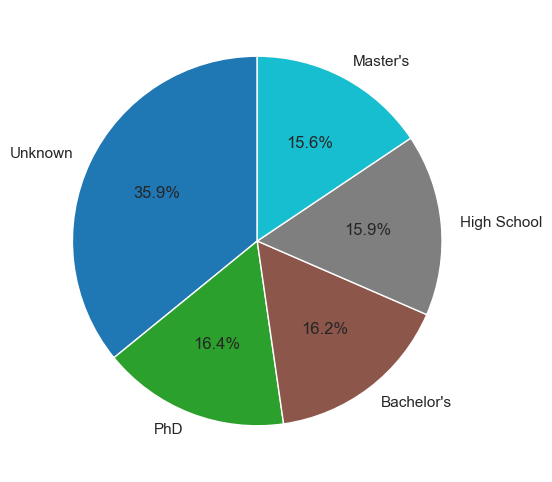

In [10]:
plt.figure(figsize=(6, 6))
dataTest["Parent_Education_Level"].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.ylabel('')
plt.show()

resualt to my heypothesis

In [11]:
#replace missing categorical data with random values from the same domain 
existing_values = data['Parent_Education_Level'].dropna().unique() #get unique values
np.random.seed(42)
data.loc[data['Parent_Education_Level'].isnull(), 'Parent_Education_Level'] = np.random.choice(existing_values, size=data['Parent_Education_Level'].isnull().sum())

In [12]:
data.isnull().sum() #ensure all the null values are handled

Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64

In [13]:
data.describe() #describe the data(mean,mode,median,IQR,etc)

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,21.048400,75.431409,70.326844,69.640788,74.798673,74.910728,4.980024,74.924860,75.121804,17.658860,5.48080,6.488140
std,1.989786,13.610481,17.213209,17.238744,13.646226,14.504281,2.890136,14.423415,14.399941,7.275864,2.86155,1.452283
min,18.000000,50.010000,40.000000,40.000000,50.000000,50.030000,0.000000,50.010000,50.020000,5.000000,1.00000,4.000000
25%,19.000000,64.737500,55.457500,54.667500,63.687500,62.490000,2.440000,62.320000,62.835000,11.400000,3.00000,5.200000
50%,21.000000,75.431409,70.510000,69.735000,74.798673,74.695000,4.955000,74.980000,75.395000,17.500000,5.00000,6.500000
75%,23.000000,86.182500,84.970000,84.500000,85.570000,87.630000,7.500000,87.367500,87.652500,24.100000,8.00000,7.700000
max,24.000000,100.000000,99.980000,99.980000,99.980000,99.960000,10.000000,100.000000,99.990000,30.000000,10.00000,9.000000


In [14]:
data.duplicated().sum() #sumbtion of the duplicated columns 

0

In [15]:
data.info() #overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [16]:
dataClean=data.copy() #get a copy of the data

In [17]:
dataClean.info() #information of the copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [18]:
dataClean.head() #first 5 rows

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Engineering,52.29,55.03,57.82,84.220000,74.06,3.99,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,Male,18,Engineering,97.27,97.23,45.80,74.798673,94.24,8.32,55.65,50.64,A,19.0,No,Yes,PhD,Medium,4,9.0
2,Male,24,Business,57.19,67.05,93.68,67.700000,85.70,5.05,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,Female,24,Mathematics,95.15,47.79,80.63,66.060000,93.51,6.54,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,Female,23,CS,54.18,46.59,78.89,96.850000,83.70,5.97,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [19]:
categorical_cols = data.select_dtypes(include=['object']) #get the columns with type category or object
unique_counts_categorical = categorical_cols.nunique() #get its unique value
unique_counts_categorical

Gender                        2
Department                    4
Grade                         5
Extracurricular_Activities    2
Internet_Access_at_Home       2
Parent_Education_Level        4
Family_Income_Level           3
dtype: int64

* Mapping The categorical data into numirical

In [20]:
from sklearn.preprocessing import LabelEncoder  # Import preprocessing from scikit-learn package Label Encoder function

# Loop on each column, initialize and fit the label encoder, then store in a dictionary
label_encoders = {col: LabelEncoder().fit(dataClean[col]) for col in categorical_cols}

# Transform categorical columns and print the mappings
for col, le in label_encoders.items():
    dataClean[col] = le.transform(dataClean[col])  # Transform categorical values to numerical labels

    # Print the mapping of original values to encoded values
    print(f"Mapping for '{col}':")#print column's name
    for category, encoded_value in zip(le.classes_, range(len(le.classes_))): #loop throw unique categorical value and its assigned number 
        print(f"  '{category}' : {encoded_value}")


Mapping for 'Gender':
  'Female' : 0
  'Male' : 1
Mapping for 'Department':
  'Business' : 0
  'CS' : 1
  'Engineering' : 2
  'Mathematics' : 3
Mapping for 'Grade':
  'A' : 0
  'B' : 1
  'C' : 2
  'D' : 3
  'F' : 4
Mapping for 'Extracurricular_Activities':
  'No' : 0
  'Yes' : 1
Mapping for 'Internet_Access_at_Home':
  'No' : 0
  'Yes' : 1
Mapping for 'Parent_Education_Level':
  'Bachelor's' : 0
  'High School' : 1
  'Master's' : 2
  'PhD' : 3
Mapping for 'Family_Income_Level':
  'High' : 0
  'Low' : 1
  'Medium' : 2


In [21]:
dataClean.tail() #making sure the values are assiged correctly

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,1,19,0,75.431409,82.15,60.33,80.090000,99.32,5.00,58.42,85.21,3,25.5,0,1,1,1,10,8.3
4996,1,19,0,65.110000,86.31,49.80,74.798673,88.08,2.79,60.87,95.96,2,5.0,0,1,3,2,4,4.0
4997,0,24,1,87.540000,63.55,64.21,94.280000,50.19,3.13,82.65,54.25,0,24.8,1,0,1,2,4,6.3
4998,1,23,1,92.560000,79.79,94.28,81.200000,61.18,0.40,94.29,55.84,0,16.1,1,1,0,1,1,8.4
4999,0,21,2,83.920000,83.24,53.47,51.760000,83.51,0.49,69.25,77.86,4,29.2,0,1,3,1,2,6.1


# Compute correlation of all columns with Total_Score

In [22]:
corr_matrix = dataClean.corr()  # Compute correlation for all numerical columns
corr_totalScore = corr_matrix['Total_Score'].sort_values(ascending=False) # Extract correlations specifically with the 'Total_Score' column
corr_totalScore

Total_Score                   1.000000
Grade                         0.023628
Age                           0.017413
Family_Income_Level           0.016060
Parent_Education_Level        0.015752
Department                    0.014338
Quizzes_Avg                   0.013963
Final_Score                   0.006597
Extracurricular_Activities    0.005930
Stress_Level (1-10)           0.004217
Sleep_Hours_per_Night         0.002037
Assignments_Avg               0.000555
Midterm_Score                -0.001225
Gender                       -0.009796
Study_Hours_per_Week         -0.012744
Internet_Access_at_Home      -0.013426
Projects_Score               -0.018489
Attendance (%)               -0.018505
Participation_Score          -0.034289
Name: Total_Score, dtype: float64

Weak correlation that's mean total score doesnt get effected by any of those

In [23]:
corr_matrix = dataClean.corr()  # Compute correlation for all numerical columns
corr_totalScore = corr_matrix['Grade'].sort_values(ascending=False) # Extract correlations specifically with the 'Grade' column
corr_totalScore

Grade                         1.000000
Quizzes_Avg                   0.029829
Final_Score                   0.028252
Assignments_Avg               0.026071
Total_Score                   0.023628
Age                           0.018937
Sleep_Hours_per_Night         0.018178
Participation_Score           0.017419
Gender                        0.014591
Midterm_Score                 0.014109
Projects_Score                0.013770
Extracurricular_Activities    0.009251
Internet_Access_at_Home       0.005241
Family_Income_Level          -0.000640
Study_Hours_per_Week         -0.002596
Department                   -0.010759
Parent_Education_Level       -0.024104
Stress_Level (1-10)          -0.024795
Attendance (%)               -0.572927
Name: Grade, dtype: float64

attendace shows Moderate Negative correlation -Negative due to A is encoded to 0-

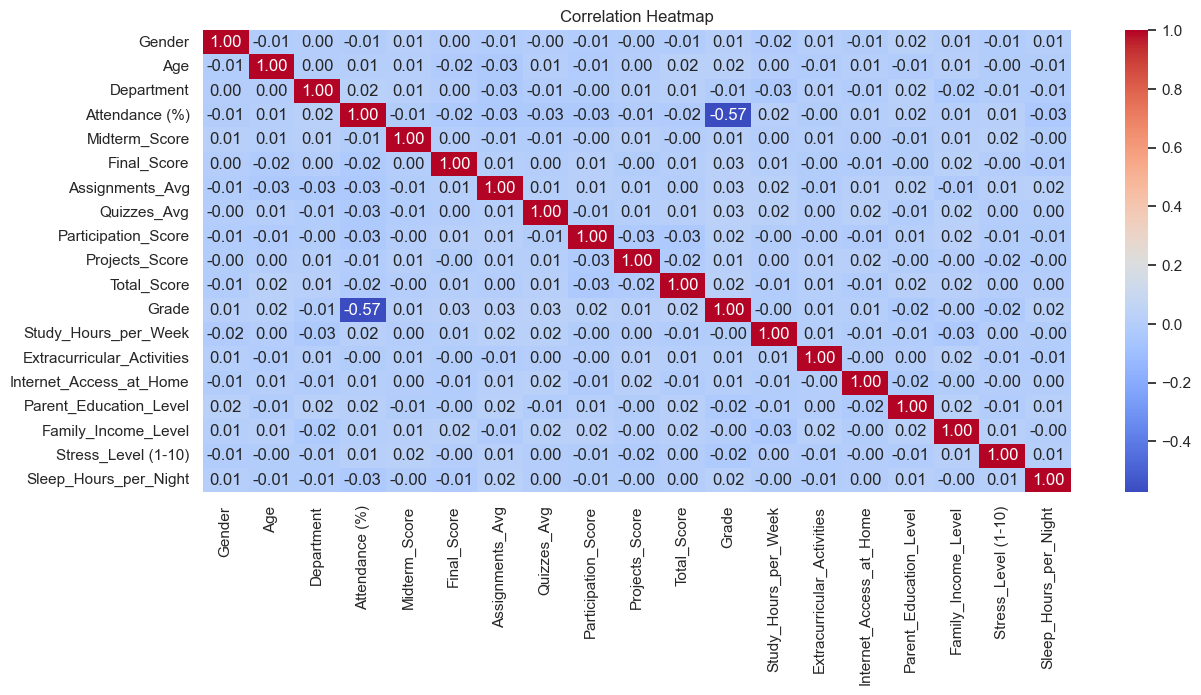

In [24]:
#correlation heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(dataClean.corr(), annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Showing a weak correlation

# Data visualization

Histogaph for Tatal score

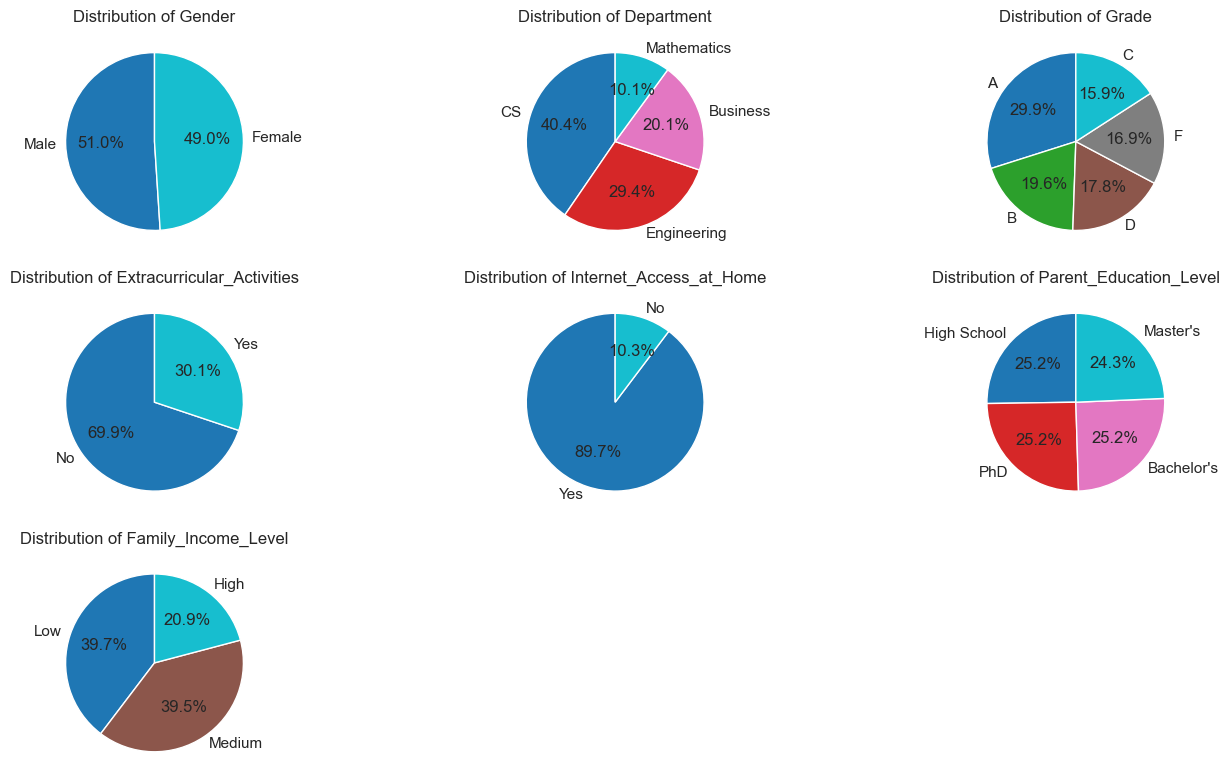

In [37]:
plt.figure(figsize=(14, 8))
# Loop through each categorical column & plot a pie chart
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)  # Create subplots
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='tab10')
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # Hide the y-label for cleaner look

plt.tight_layout()
plt.show()


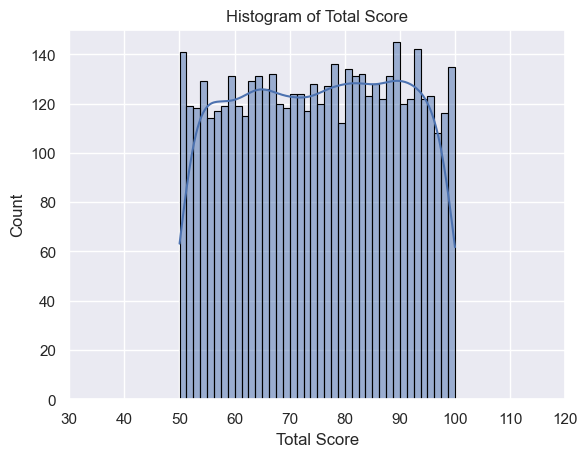

In [39]:
sns.histplot(data["Total_Score"], bins=40, kde=True, edgecolor="black")  #histograph for the total score
plt.xlabel("Total Score")
plt.ylabel("Count")
plt.xlim(30,120)
plt.ylim(0,150)
plt.title("Histogram of Total Score")  
plt.show()

It's close enough to a bell graph, which means it's normally distributed

Pie graph between males and females

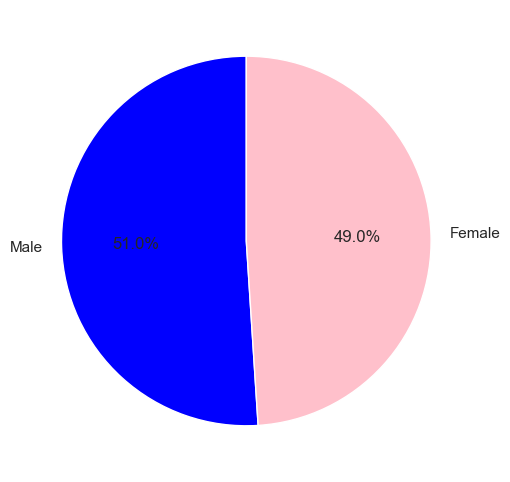

In [27]:
gender_counter=data['Gender'].value_counts() #count each gender
plt.figure(figsize=(6, 6)) #figer size
plt.pie(gender_counter, labels=gender_counter.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'pink']) #pie graph for male and females in percentage  
plt.show()

It shows that the number of male students are more that females

Grades of Males and Females students

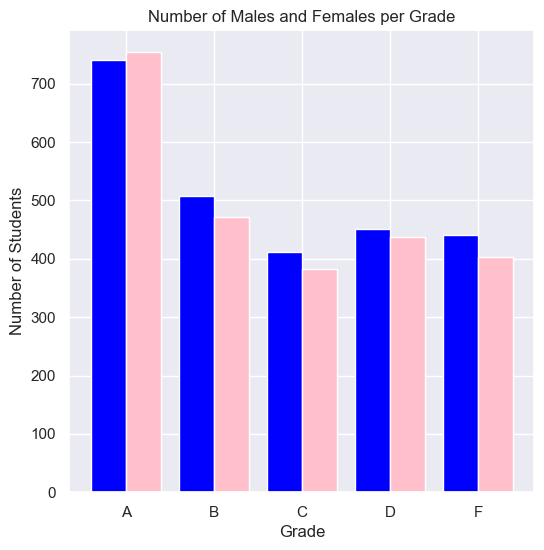

In [28]:
male= data[data['Gender'] == 'Male']  #select * where gender=Male
female= data[data['Gender'] == 'Female'] #select * where gender=Female

male_counter =male['Grade'].value_counts().sort_index() #count males to each grade
female_counter =female['Grade'].value_counts().sort_index() #count females to each grade
grade =sorted(set(data['Grade']))# get all unique grades
x = np.arange(len(grade)) #position of each grade
plt.figure(figsize=(6, 6)) #figure size
plt.bar(x - 0.4 /2, male_counter, width=0.4 , color='blue', label='Males') #bar plot x has the  postion of the columns and y is the counter width of the column =0.4
plt.bar(x + 0.4 /2, female_counter, width=0.4 , color='pink', label='Females') #bar plot x has the  postion of the columns and y is the counter width of the column =0.4
plt.xlabel("Grade") #label of x-axis
plt.ylabel("Number of Students") #Label of y-axis
plt.title("Number of Males and Females per Grade") #Title of plot
plt.xticks(ticks=x, labels=grade) #Bars name of x-axis
plt.show()

Female students achieved better A, but male students achieved better results elsewhere.

Distribution of Total score between Males and Females

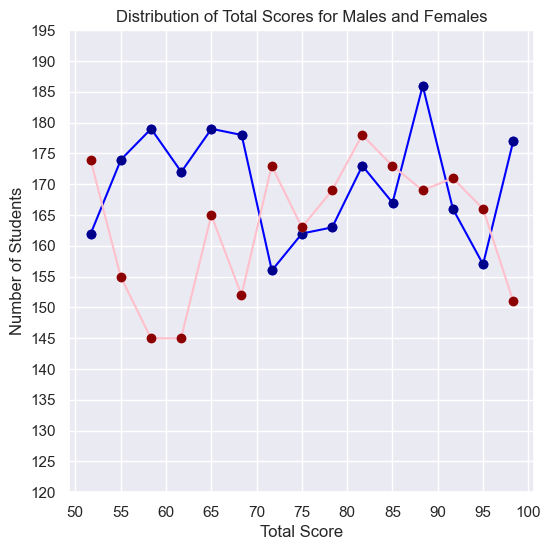

In [29]:
male_scores = male['Total_Score']
female_scores = female['Total_Score']

# Compute histogram data for males and females students
male_count, male_bin_edge = np.histogram(male_scores, bins=15)
female_count, female_bin_edge = np.histogram(female_scores, bins=15)

male_bin_centers = (male_bin_edge[:-1] + male_bin_edge[1:]) / 2 # Compute bin centers for males
female_bin_centers = (female_bin_edge[:-1] + female_bin_edge[1:]) / 2 # Compute bin centers for females

# Create figure
plt.figure(figsize=(6, 6))
plt.plot(male_bin_centers, male_count, color='blue', linestyle='-', marker='o')
plt.scatter(male_bin_centers, male_count, color='darkblue', zorder=2)  # Highlight points

plt.plot(female_bin_centers, female_count, color='pink', linestyle='-', marker='o')
plt.scatter(female_bin_centers, female_count, color='darkred', zorder=2)  # Highlight points

plt.xlabel("Total Score")
plt.xticks(np.arange(50, 105,5)) #range from 50 to 100 and with step size of 5 
plt.yticks(np.arange(120, 200,5))
plt.ylabel("Number of Students")
plt.title("Distribution of Total Scores for Males and Females")
plt.show()


on avg Male scored more from 50 to 70 and females scored better from 70 to 85

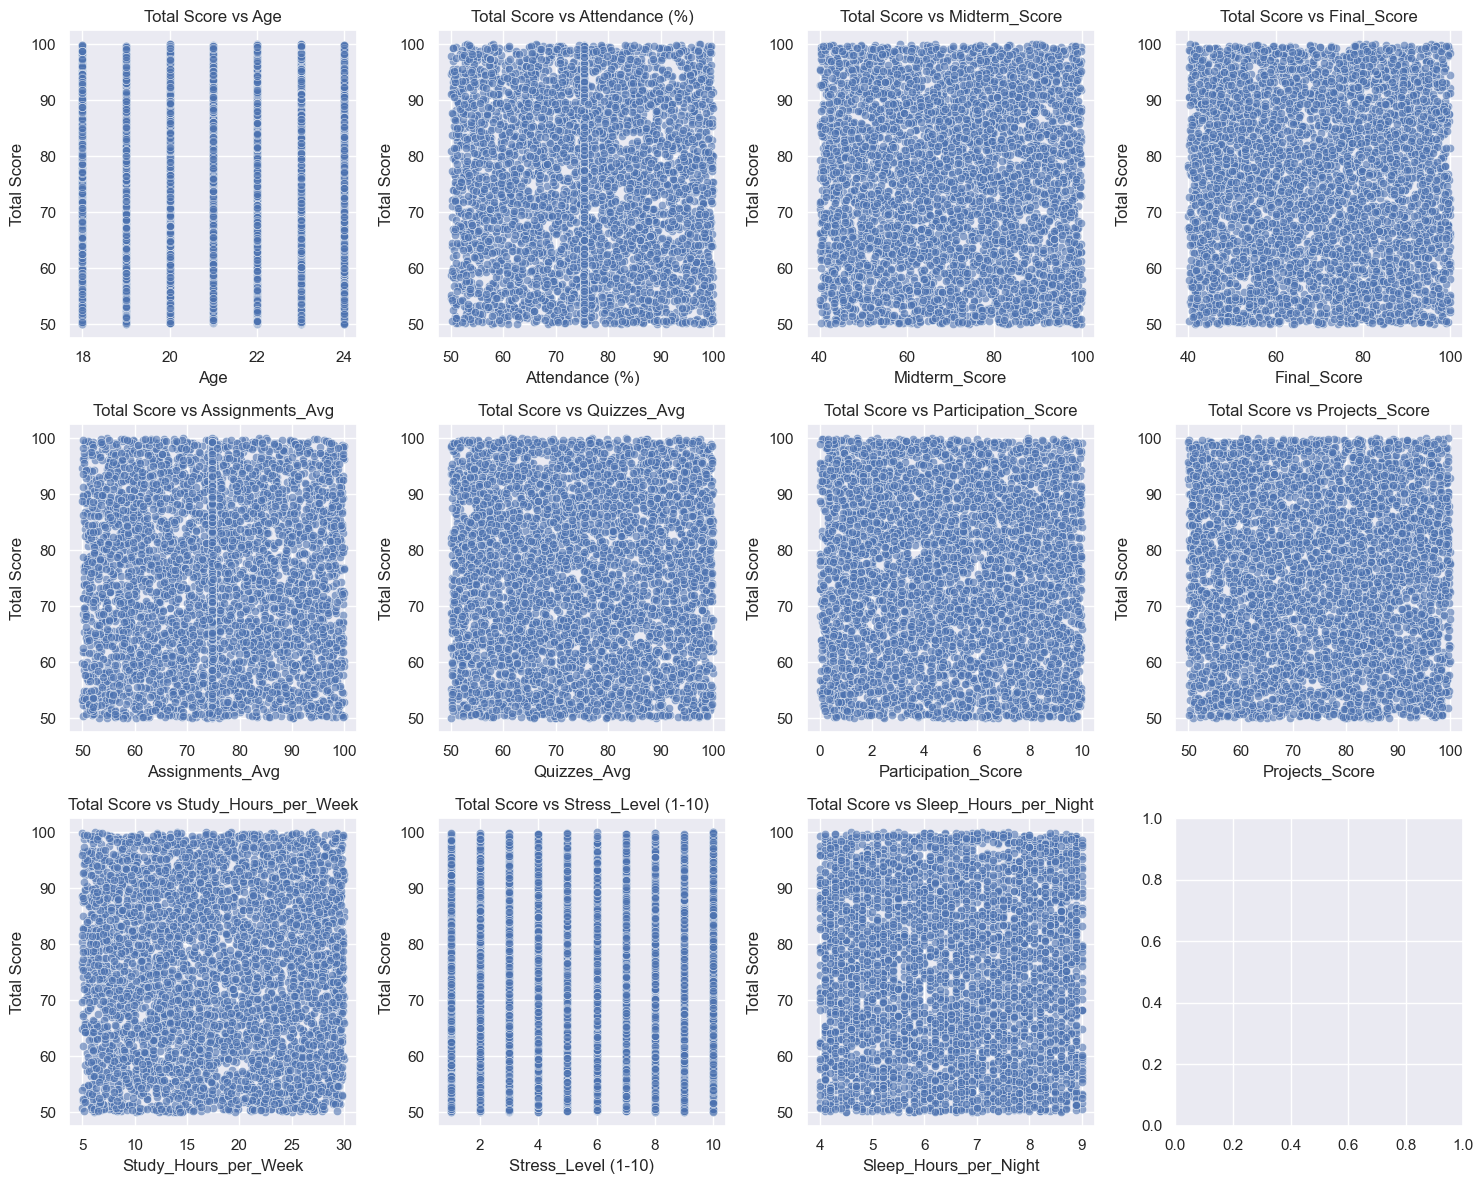

In [30]:
numerical_cols = [col for col in data.select_dtypes(include=['number']).columns if col != "Total_Score"] # Select numerical columns excluding "Total_Score"
num_plots = len(numerical_cols)

# Determine grid size dynamically
cols = min(num_plots, 4)  # Max 4 columns per row
rows = (num_plots // cols) + (num_plots % cols > 0)  # Adjust rows based on number of columns

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=data[col], y=data["Total_Score"], ax=axes[i], alpha=0.6)
    axes[i].set_title(f"Total Score vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total Score")
plt.tight_layout()
plt.show()

Its a miss that's ensures the hypothesis if there is no correlation between total score and any column

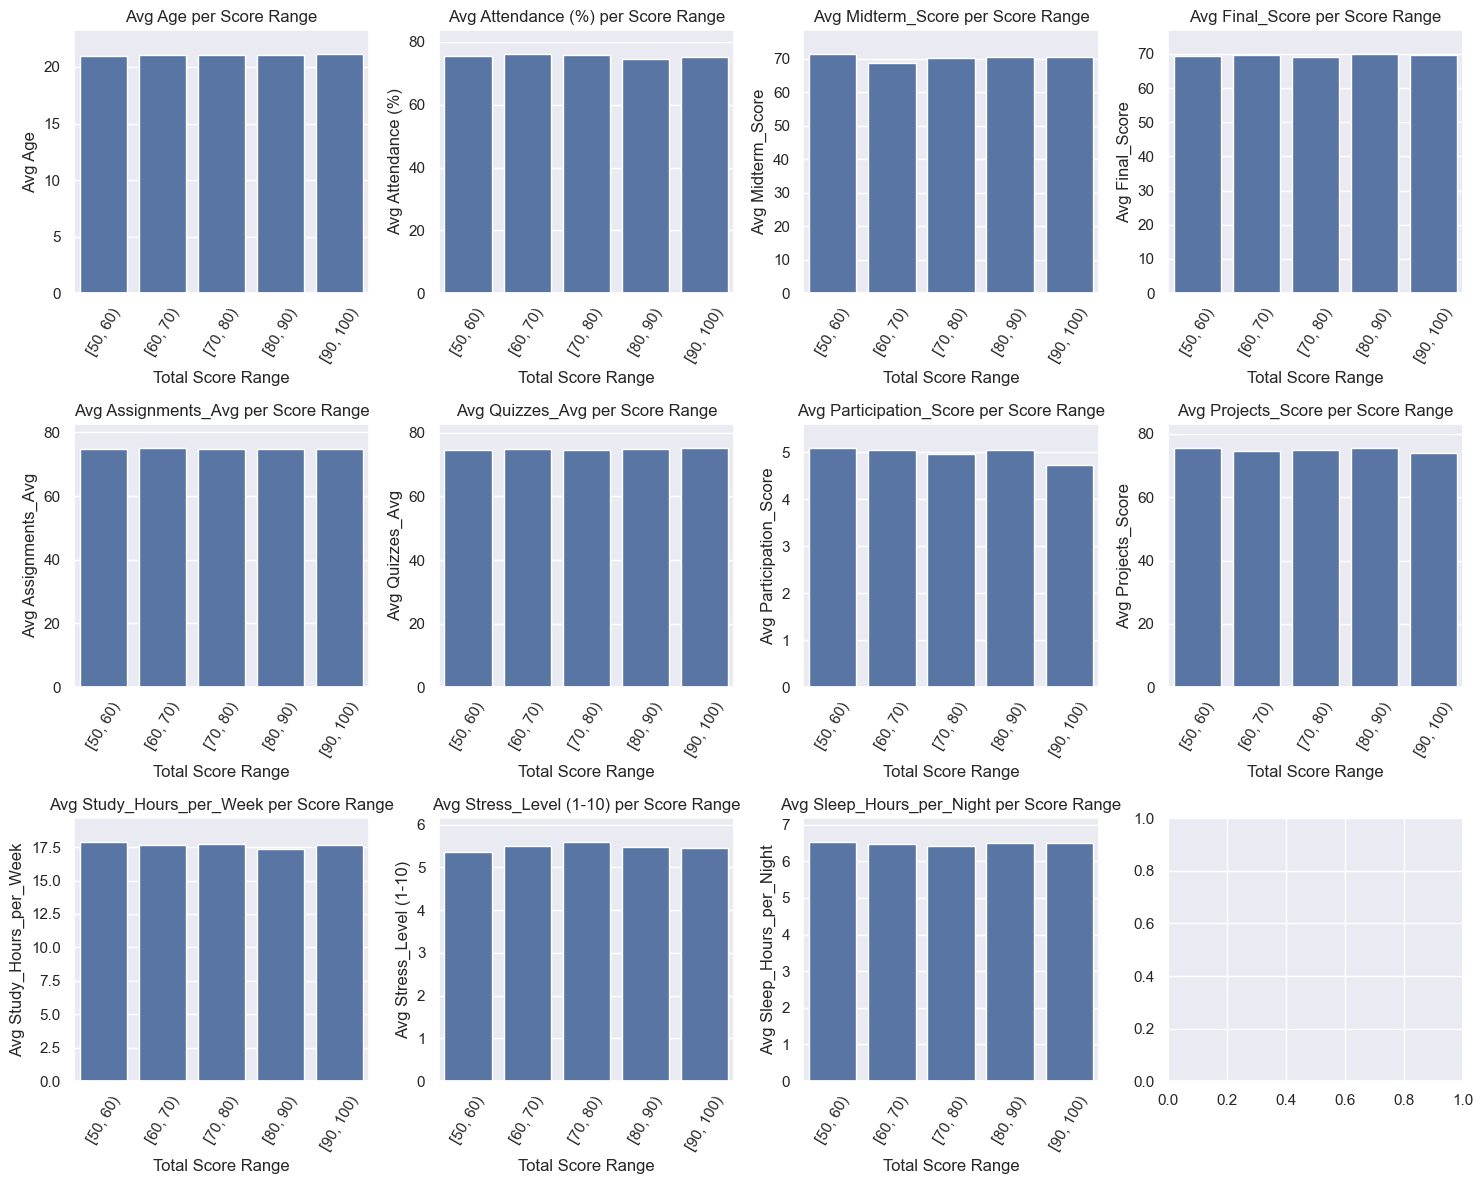

In [31]:
data["Score_Range"] = pd.cut(data["Total_Score"], bins=range(50, 105, 10), right=False)# Bin Total Score into ranges of 10, starting from 50 to 110

numerical_cols = [col for col in data.select_dtypes(include=['number']).columns if col != "Total_Score"]# Select numerical columns excluding "Total_Score"
num_plots = len(numerical_cols)

# Determine grid size dynamically
cols = min(num_plots, 4)  # from plots' number to  Maximum of 4 columns per row
rows = -(-num_plots // cols)  #number of rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten for easier indexing

# Plot each numerical column grouped by Score_Range
for i, col in enumerate(numerical_cols):
    grouped_data = data.groupby("Score_Range", observed=True)[col].mean().reset_index()
    sns.barplot(x=grouped_data["Score_Range"], y=grouped_data[col], ax=axes[i])
    axes[i].set_title(f"Avg {col} per Score Range")
    axes[i].set_xlabel("Total Score Range")
    axes[i].set_ylabel(f"Avg {col}")
    axes[i].tick_params(axis='x', rotation=60)  # Rotate x-axis labels for readability
    ymax = grouped_data[col].max() * 1.1  # Increase max value by 10%
    axes[i].set_ylim(0, ymax)
plt.tight_layout()
plt.show()


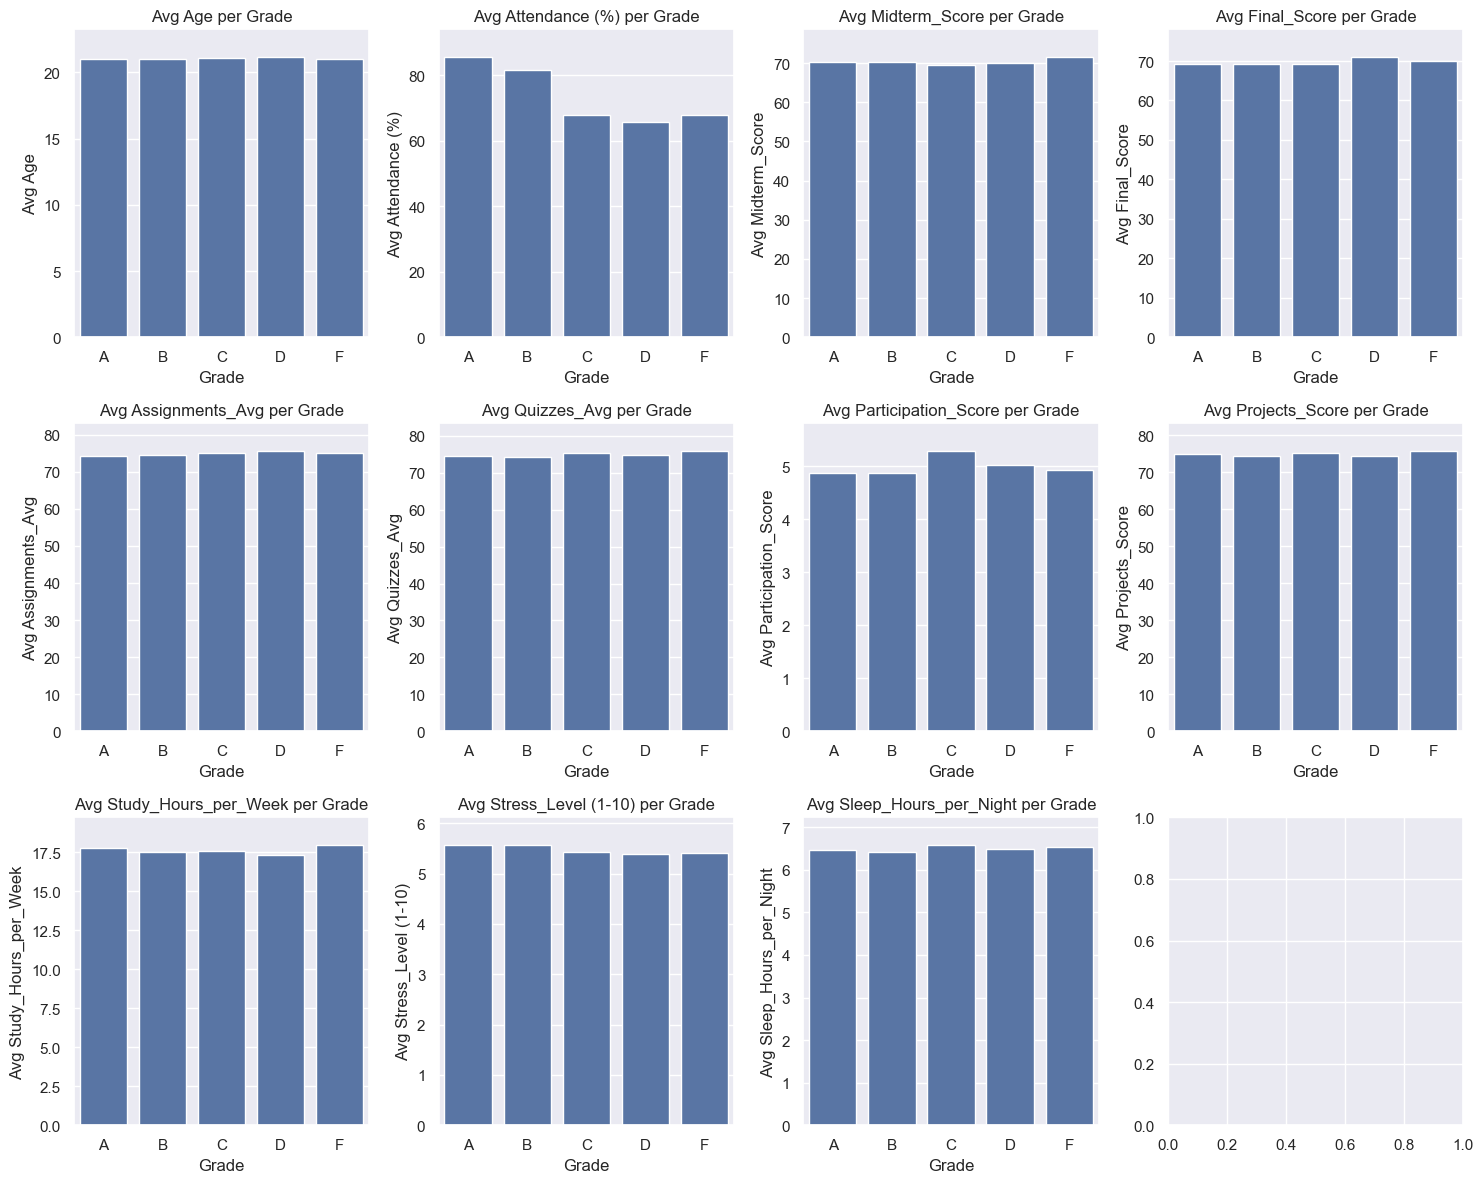

In [32]:
grade_order = ["A", "B", "C", "D", "F"] # Define the grade order from A to F

numerical_cols = [col for col in data.select_dtypes(include=['number']).columns if col != "Total_Score"]# Select numerical columns excluding "Total_Score"
num_plots = len(numerical_cols)

# Determine grid size dynamically
cols = min(num_plots, 4)  # Maximum 4 columns per row
rows = -(-num_plots // cols)  # Equivalent to math.ceil(num_plots / cols)

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten for easier indexing

# Plot each numerical column grouped by Grade
for i, col in enumerate(numerical_cols):
    grouped_data = data.groupby("Grade", observed=True)[col].mean().reset_index()

    # Ensure grades are ordered correctly from A to F
    grouped_data["Grade"] = pd.Categorical(grouped_data["Grade"], categories=grade_order, ordered=True)
    grouped_data = grouped_data.sort_values("Grade")  # Sort according to the defined order
    
    sns.barplot(x=grouped_data["Grade"], y=grouped_data[col], ax=axes[i])
    axes[i].set_title(f"Avg {col} per Grade")
    axes[i].set_xlabel("Grade")
    axes[i].set_ylabel(f"Avg {col}")
    ymax = grouped_data[col].max() * 1.1  # Increase max value by 10%
    axes[i].set_ylim(0, ymax)

plt.tight_layout()
plt.show()
